In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
log_ratios = pd.read_table('../Cameron/log-ratios_dp.tsv', sep='\t', index_col=0)
log_ratios

,log_Lachnospiraceae_Coriobacteriaceae,log_S24-7_Coriobacteriaceae,log_Ruminococcaceae_Coriobacteriaceae,log_Ruminococcaceae_Verrucomicrobiaceae,log_Coriobacteriaceae_Verrucomicrobiaceae,log(UCA/TbMCA),sb_pcon,sb_carn,anonymized_name,cage_food_consumption_g,...,scientific_name,sex,taxon_id,title,treatment,merged_time,train_test_mmvec,ZT,CDCA_TbMCA,UDCA_TbMCA
125_1,4.149914,7.521318,2.597385,-3.838766,-6.436150,-4.919158,-2.766114,-1.991610,A24.125.1,not applicable,...,mouse gut metagenome,male,410661,IHC CR,In chamber,IHC0.0,Test,2,-2.766114,-1.991610
125_2,3.806662,7.438804,2.649210,-3.990666,-6.639876,-3.271902,-2.960344,-1.127313,A24.125.2,not applicable,...,mouse gut metagenome,male,410661,IHC CR,In chamber,IHC4.0,Test,6,-2.960344,-1.127313
125_3,2.678450,5.347851,1.584120,-2.892506,-4.476626,NaN,NaN,NaN,A24.125.3,not applicable,...,mouse gut metagenome,male,410661,IHC CR,In chamber,IHC8.0,Train,10,NaN,NaN
125_4,2.620767,4.794680,0.557481,-3.818933,-4.376414,-3.621422,-1.167837,-1.066824,A24.125.4,not applicable,...,mouse gut metagenome,male,410661,IHC CR,In chamber,IHC12.0,Train,14,-1.167837,-1.066824
125_5,4.809471,7.551187,3.106080,-5.186218,-8.292298,-3.893179,-1.586027,-1.281105,A24.125.5,not applicable,...,mouse gut metagenome,male,410661,IHC CR,In chamber,IHC16.0,Test,18,-1.586027,-1.281105
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133_2,2.984347,4.095602,0.644829,-4.040442,-4.685271,-4.229319,-1.177647,-0.371167,A32.133.2,not applicable,...,mouse gut metagenome,male,410661,IHC CR,On shelf,Air4.0,Test,6,-1.177647,-0.371167
133_3,3.077880,3.314933,0.231329,-3.932891,-4.164220,-4.409772,-0.570492,-0.440047,A32.133.3,not applicable,...,mouse gut metagenome,male,410661,IHC CR,On shelf,Air8.0,Train,10,-0.570492,-0.440047
133_4,NaN,NaN,NaN,NaN,NaN,-4.577107,-1.692169,-1.113632,A32.133.4,not applicable,...,mouse gut metagenome,male,410661,IHC CR,On shelf,Air12.0,Test,14,-1.692169,-1.113632
133_5,2.592188,4.420692,0.790786,-5.193732,-5.984517,-6.171609,-1.730004,-1.414988,A32.133.5,not applicable,...,mouse gut metagenome,male,410661,IHC CR,On shelf,Air16.0,Train,18,-1.730004,-1.414988


In [3]:
log_ratios.columns

Index(['log_Lachnospiraceae_Coriobacteriaceae', 'log_S24-7_Coriobacteriaceae',
       'log_Ruminococcaceae_Coriobacteriaceae',
       'log_Ruminococcaceae_Verrucomicrobiaceae',
       'log_Coriobacteriaceae_Verrucomicrobiaceae', 'log(UCA/TbMCA)',
       'sb_pcon', 'sb_carn', 'anonymized_name', 'cage_food_consumption_g',
       'cage_location', 'cage_notes', 'cage_number', 'Both', 'timepoint',
       'cycle', 'collection_timestamp', 'description', 'diet', 'dob',
       'elevation', 'empo_1', 'empo_2', 'empo_3', 'env_biome', 'env_feature',
       'env_material', 'env_package', 'experiment_duration', 'exposure_start',
       'exposure_type', 'general_notes', 'genotype', 'geo_loc_name',
       'host_age', 'host_age_units', 'host_body_habitat', 'host_body_product',
       'host_body_site', 'host_life_stage', 'host_scientific_name',
       'host_subject_id', 'host_taxid', 'host_weight', 'host_weight_units',
       'latitude', 'longitude', 'metabolomics_sample_id', 'mouse_notes',
       'mous

In [4]:
LR = ['log_Ruminococcaceae_Verrucomicrobiaceae', 'log_Ruminococcaceae_Coriobacteriaceae',
       'log_Coriobacteriaceae_Verrucomicrobiaceae', 'log_Lachnospiraceae_Coriobacteriaceae',
       'log_S24-7_Coriobacteriaceae', 'CDCA_TbMCA', 'UDCA_TbMCA']

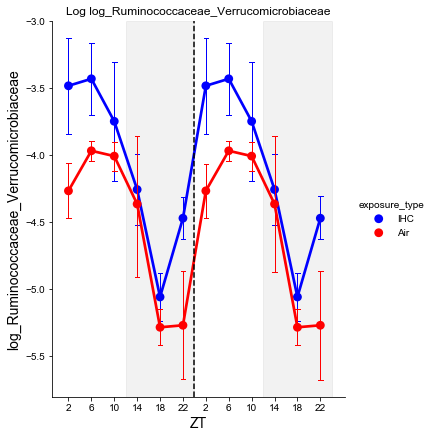

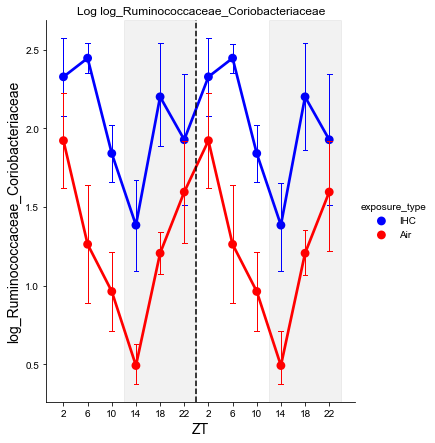

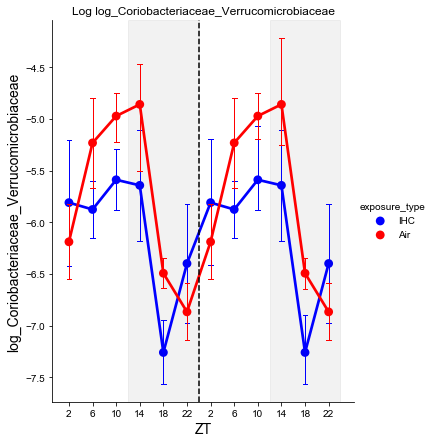

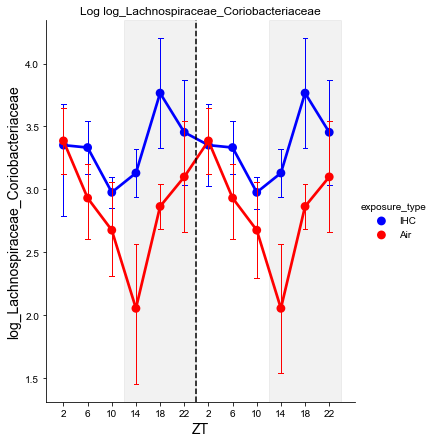

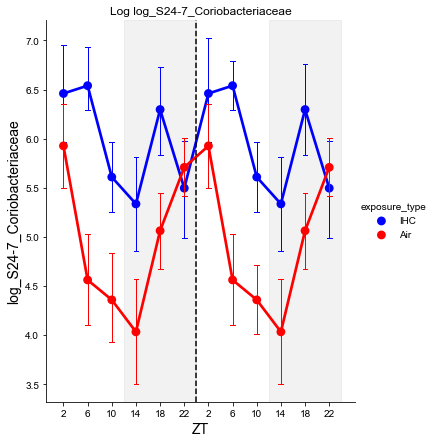

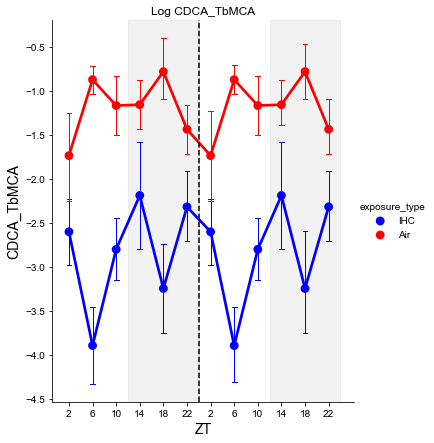

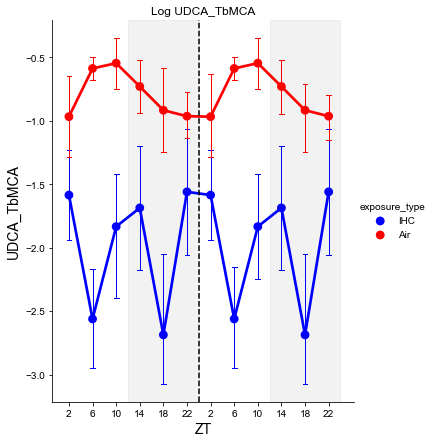

In [5]:
for lrs in LR:
    g = sns.catplot(x="timepoint", y=lrs,
                hue="exposure_type", capsize=.2, palette=['blue', 'red'], ci=68,
                height=6, aspect=.85, kind="point", errwidth=1, data=log_ratios)

    plt.axvspan(2.5, 5.5, alpha=0.05, color='black')
    plt.axvspan(8.5, 11.5, alpha=0.05, color='black')
    plt.axvline(x=5.5, color='k', linestyle='--')
    plt.title("Log %s" % lrs)
    plt.ylabel(lrs, fontsize=14)
    plt.xlabel('ZT', fontsize=14)
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Arial'
    plt.rcParams['svg.fonttype'] = 'none'
    plt.xticks(np.arange(12), ('2', '6', '10', '14', '18', '22', '2', '6', '10', '14', '18', '22'))
    plt.savefig('../figures/cIHC_lrs_double_%s.svg' % lrs, dpi=300, bbox_inches = "tight")
    plt.show()

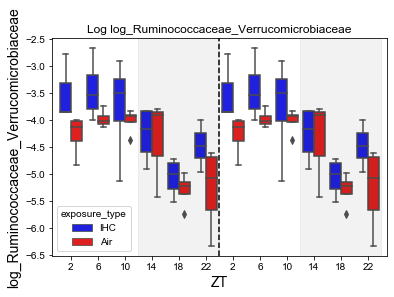

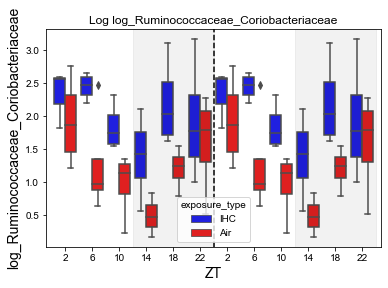

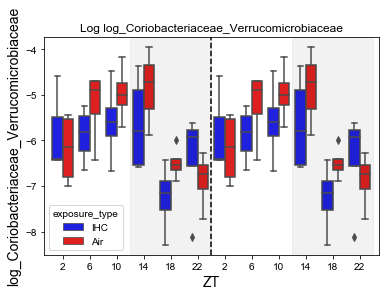

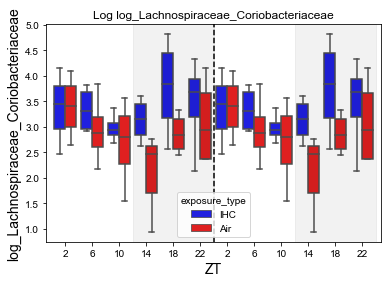

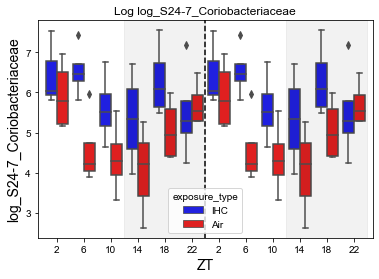

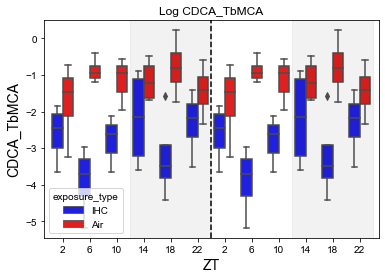

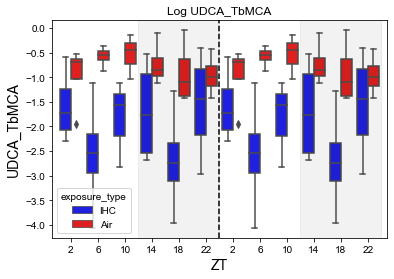

In [6]:
for lrs in LR:
    g = sns.boxplot(x="timepoint", y=lrs, 
                hue="exposure_type", palette=['blue', 'red'], data=log_ratios)

    plt.axvspan(2.5, 5.5, alpha=0.05, color='black')
    plt.axvspan(8.5, 11.5, alpha=0.05, color='black')
    plt.axvline(x=5.5, color='k', linestyle='--')
    plt.title("Log %s" % lrs)
    plt.ylabel(lrs, fontsize=14)
    plt.xlabel('ZT', fontsize=14)
    plt.xticks(np.arange(12), ('2', '6', '10', '14', '18', '22', '2', '6', '10', '14', '18', '22'))
    #plt.savefig('../figures/cIHC_lrs_double_%s_SEM.svg' %lrs, dpi=300, bbox_inches = "tight")
    plt.show()

In [7]:
from statannot import add_stat_annotation

In [8]:
log_ratios.shape

(96, 64)

In [9]:
log_ratios2 = log_ratios[log_ratios.timepoint.isin([1, 2, 3, 4, 5, 6])].copy()

In [10]:
log_ratios2.shape

(48, 64)

In [11]:
log_ratios2.sort_values('exposure_type', inplace=True)
log_ratios2.sort_values('cycle', inplace=True)

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

night_IHC v.s. night_Air: Mann-Whitney-Wilcoxon test two-sided P_val=1.316e-01 U_stat=9.100e+01
day_IHC v.s. day_Air: Mann-Whitney-Wilcoxon test two-sided P_val=6.167e-03 U_stat=1.110e+02
day_Air v.s. night_Air: Mann-Whitney-Wilcoxon test two-sided P_val=8.905e-03 U_stat=1.090e+02
day_IHC v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=2.315e-03 U_stat=1.160e+02


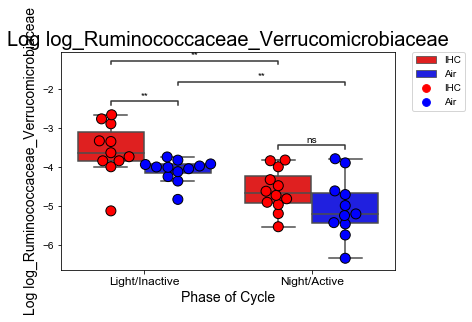

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

night_IHC v.s. night_Air: Mann-Whitney-Wilcoxon test two-sided P_val=3.373e-02 U_stat=1.010e+02
day_IHC v.s. day_Air: Mann-Whitney-Wilcoxon test two-sided P_val=7.423e-03 U_stat=1.100e+02
day_Air v.s. night_Air: Mann-Whitney-Wilcoxon test two-sided P_val=5.181e-01 U_stat=7.700e+01
day_IHC v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=1.481e-01 U_stat=9.000e+01


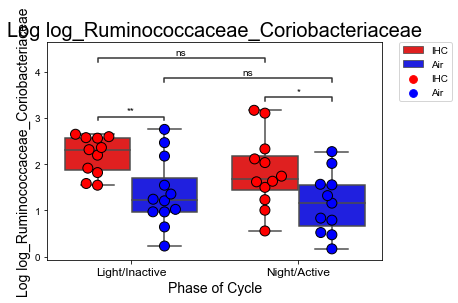

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

night_IHC v.s. night_Air: Mann-Whitney-Wilcoxon test two-sided P_val=8.294e-01 U_stat=6.200e+01
day_IHC v.s. day_Air: Mann-Whitney-Wilcoxon test two-sided P_val=5.181e-01 U_stat=5.500e+01
day_Air v.s. night_Air: Mann-Whitney-Wilcoxon test two-sided P_val=9.055e-02 U_stat=9.400e+01
day_IHC v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=1.661e-01 U_stat=8.900e+01


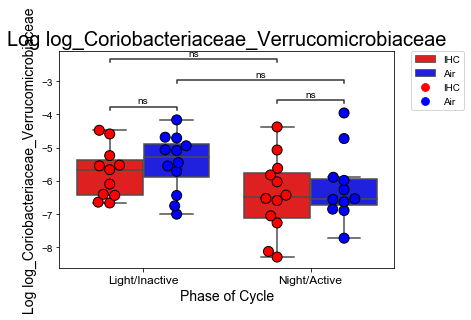

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

night_IHC v.s. night_Air: Mann-Whitney-Wilcoxon test two-sided P_val=3.923e-02 U_stat=1.000e+02
day_IHC v.s. day_Air: Mann-Whitney-Wilcoxon test two-sided P_val=6.891e-01 U_stat=7.300e+01
day_Air v.s. night_Air: Mann-Whitney-Wilcoxon test two-sided P_val=3.722e-01 U_stat=8.100e+01
day_IHC v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=4.791e-01 U_stat=5.400e+01


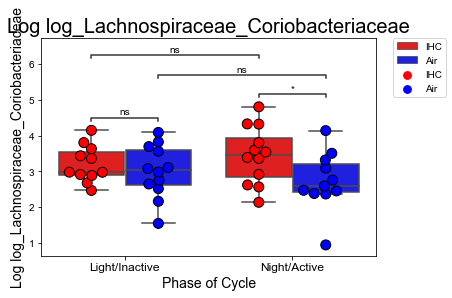

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

night_IHC v.s. night_Air: Mann-Whitney-Wilcoxon test two-sided P_val=2.301e-01 U_stat=8.600e+01
day_IHC v.s. day_Air: Mann-Whitney-Wilcoxon test two-sided P_val=1.064e-02 U_stat=1.080e+02
day_Air v.s. night_Air: Mann-Whitney-Wilcoxon test two-sided P_val=5.588e-01 U_stat=5.600e+01
day_IHC v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=2.815e-01 U_stat=8.400e+01


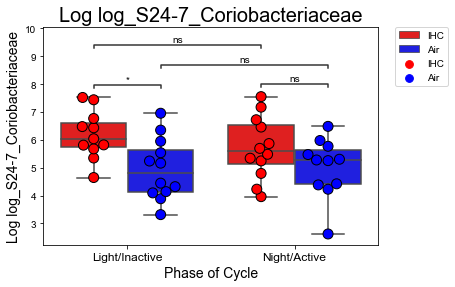

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

night_IHC v.s. night_Air: Mann-Whitney-Wilcoxon test two-sided P_val=6.099e-03 U_stat=2.400e+01
day_IHC v.s. day_Air: Mann-Whitney-Wilcoxon test two-sided P_val=5.010e-04 U_stat=7.000e+00
day_Air v.s. night_Air: Mann-Whitney-Wilcoxon test two-sided P_val=8.777e-01 U_stat=6.300e+01
day_IHC v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=2.549e-01 U_stat=4.700e+01


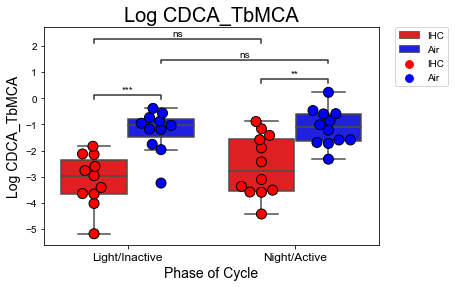

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

night_IHC v.s. night_Air: Mann-Whitney-Wilcoxon test two-sided P_val=2.258e-02 U_stat=3.200e+01
day_IHC v.s. day_Air: Mann-Whitney-Wilcoxon test two-sided P_val=1.026e-03 U_stat=1.000e+01
day_Air v.s. night_Air: Mann-Whitney-Wilcoxon test two-sided P_val=2.301e-01 U_stat=8.600e+01
day_IHC v.s. night_IHC: Mann-Whitney-Wilcoxon test two-sided P_val=9.755e-01 U_stat=6.500e+01


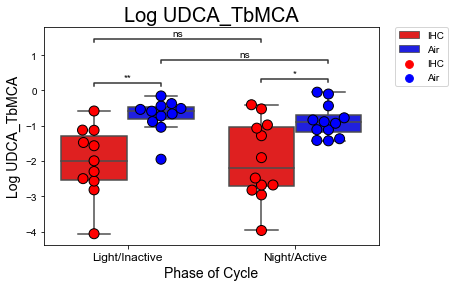

In [12]:
box_pairs=[(("day", "Air"), ("day", "IHC")),
           (("night", "Air"), ("night", "IHC")), 
          (("day", "Air"), ("night", "Air")),
           (("day", "IHC"), ("night", "IHC"))]
for lrs in LR:
    g = sns.boxplot(x="cycle", y=lrs, hue="exposure_type", 
                    palette=['red', 'blue'], data=log_ratios2)
    g = sns.swarmplot(x="cycle", y=lrs, dodge=True, s=10, linewidth=1, edgecolor='k', 
                hue="exposure_type", palette=['red', 'blue'], data=log_ratios2)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title("Log %s" %lrs, fontsize=20)
    plt.ylabel("Log %s" %lrs, fontsize=14)
    plt.xlabel('Phase of Cycle', fontsize=14)
    plt.xticks(np.arange(2), ('Light/Inactive', 'Night/Active'), fontsize=12)
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Arial'
    plt.rcParams['svg.fonttype'] = 'none'
    add_stat_annotation(g, data=log_ratios2, x="cycle", y=lrs, hue="exposure_type",
                    box_pairs=box_pairs,
                    test='Mann-Whitney', loc='inside', verbose=2)
    plt.savefig('../figures/cIHC_lrs_box_%s.svg' %lrs, dpi=300, bbox_inches = "tight")
    plt.show()

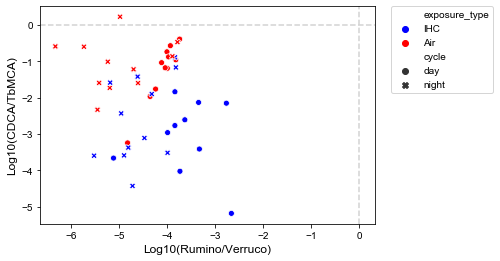

In [13]:
ax = sns.scatterplot(x='log_Ruminococcaceae_Verrucomicrobiaceae', y='CDCA_TbMCA', hue="exposure_type", style='cycle',
                palette=['blue', 'red'], markers=['o', 'X'], data=log_ratios2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.axhline(0, color='lightgrey', ls='--')
ax.axvline(0, color='lightgrey', ls='--')
plt.ylabel('Log10(CDCA/TbMCA)', fontsize=12)
plt.xlabel('Log10(Rumino/Verruco)', fontsize=12)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/micro_metab_logratios1.svg', dpi=300, bbox_inches = "tight")
plt.show()

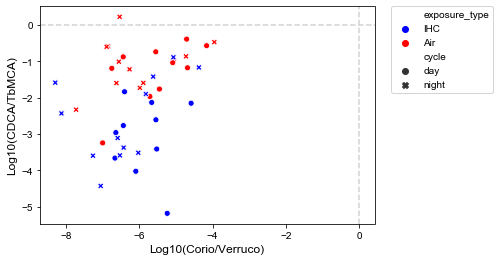

In [16]:
ax = sns.scatterplot(x='log_Coriobacteriaceae_Verrucomicrobiaceae', y='CDCA_TbMCA', hue="exposure_type", style='cycle',
                palette=['blue', 'red'], markers=['o', 'X'], data=log_ratios2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.axhline(0, color='lightgrey', ls='--')
ax.axvline(0, color='lightgrey', ls='--')
plt.ylabel('Log10(CDCA/TbMCA)', fontsize=12)
plt.xlabel('Log10(Corio/Verruco)', fontsize=12)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/micro_metab_logratios2.svg', dpi=300, bbox_inches = "tight")
plt.show()

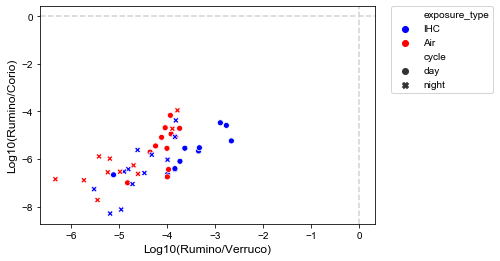

In [15]:
ax = sns.scatterplot(x='log_Ruminococcaceae_Verrucomicrobiaceae', y='log_Coriobacteriaceae_Verrucomicrobiaceae', hue="exposure_type", style='cycle',
                palette=['blue', 'red'], markers=['o', 'X'], data=log_ratios2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ax.axhline(0, color='lightgrey', ls='--')
ax.axvline(0, color='lightgrey', ls='--')
plt.ylabel('Log10(Rumino/Corio)', fontsize=12)
plt.xlabel('Log10(Rumino/Verruco)', fontsize=12)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/micro_metab_logratios3.svg', dpi=300, bbox_inches = "tight")
plt.show()

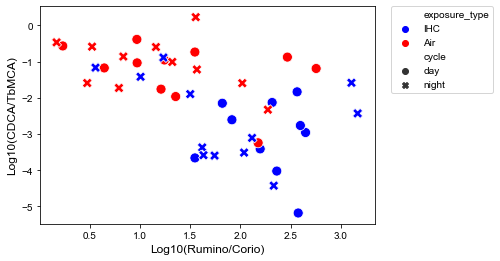

In [42]:
ax = sns.scatterplot(x='log_Ruminococcaceae_Coriobacteriaceae', y='CDCA_TbMCA', hue="exposure_type", style='cycle',
                palette=['blue', 'red'], markers=['o', 'X'], s=100, data=log_ratios2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#ax.axhline(0, color='lightgrey', ls='--')
#ax.axvline(0, color='lightgrey', ls='--')
plt.ylabel('Log10(CDCA/TbMCA)', fontsize=12)
plt.xlabel('Log10(Rumino/Corio)', fontsize=12)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/micro_metab_logratios_RCCT.svg', dpi=300, bbox_inches = "tight")
plt.show()

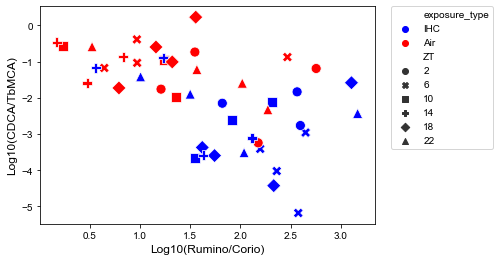

In [56]:
ax = sns.scatterplot(x='log_Ruminococcaceae_Coriobacteriaceae', y='CDCA_TbMCA', hue="exposure_type", style='ZT',
                palette=['blue', 'red'], s=100, data=log_ratios2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Log10(CDCA/TbMCA)', fontsize=12)
plt.xlabel('Log10(Rumino/Corio)', fontsize=12)
plt.show()

In [23]:
from scipy import stats

In [31]:
log_ratios_nan = log_ratios2.copy()
log_ratios_nan = log_ratios_nan.dropna(subset=['log_Ruminococcaceae_Coriobacteriaceae', 'CDCA_TbMCA'])
print(log_ratios2.shape)
print(log_ratios_nan.shape)
#4 samples dropped due to nans

(48, 64)
(44, 64)


slope -0.8709186588723361
p =  0.0001553042592513706
R2= 0.29149469794208444


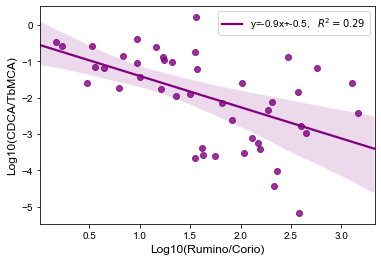

In [40]:
slope, intercept, r_value, p_value, std_err = stats.linregress(log_ratios_nan['log_Ruminococcaceae_Coriobacteriaceae'],
                                                                    log_ratios_nan['CDCA_TbMCA'])
print("slope", slope)
print("p = ", p_value)
print('R2=', r_value*r_value)
ax = sns.regplot(x='log_Ruminococcaceae_Coriobacteriaceae', y='CDCA_TbMCA', robust=True,
                color='purple', data=log_ratios_nan, 
               line_kws={'label':"y={0:.1f}x+{1:.1f},   ".format(slope,intercept) + '$R^2={0:.2f}$'.format(r_value**2)})
ax.legend()
plt.ylabel('Log10(CDCA/TbMCA)', fontsize=12)
plt.xlabel('Log10(Rumino/Corio)', fontsize=12)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/micro_metab_logratios_RCCT_linear.svg', dpi=300, bbox_inches = "tight")
plt.show()

In [36]:
r_value, p_value = stats.pearsonr(log_ratios_nan['log_Ruminococcaceae_Coriobacteriaceae'],
                                                                    log_ratios_nan['CDCA_TbMCA'])
print ("r", r_value)
print ("R2", r_value**2)
print ("p-value", p_value)

r -0.5399024892905057
R2 0.2914946979420846
p-value 0.0001553042592513701


In [45]:
from sklearn.metrics.pairwise import paired_distances
from sklearn.metrics.pairwise import euclidean_distances
import itertools

In [47]:
for exp in itertools.combinations(log_ratios_nan.exposure_type.unique(), 2):
    X = log_ratios_nan[log_ratios_nan['exposure_type'] == exp[0]]
    Y = log_ratios_nan[log_ratios_nan['exposure_type'] == exp[1]]
    pairsX = pd.DataFrame(X, columns=['log_Ruminococcaceae_Coriobacteriaceae', 'CDCA_TbMCA'])
    pairsY = pd.DataFrame(Y, columns=['log_Ruminococcaceae_Coriobacteriaceae', 'CDCA_TbMCA'])
    print(exp, "mean between group Euclidean distance", euclidean_distances(pairsX, pairsY).mean())

('IHC', 'Air') mean between group Euclidean distance 2.1640044281575026


In [49]:
pairsX

,log_Ruminococcaceae_Coriobacteriaceae,CDCA_TbMCA
127_3,2.316284,-2.130875
126_3,1.547563,-3.660771
125_2,2.649210,-2.960344
125_1,2.597385,-2.766114
127_1,2.564949,-1.836909
127_2,2.197225,-3.411513
126_2,2.575878,-5.180937
126_1,1.820090,-2.151581
128_3,1.915696,-2.607574
128_2,2.362304,-4.023390


In [50]:
from scipy.spatial import distance_matrix
distance_matrix(pairsX, pairsY)

array([[1.03556268, 2.60419513, 1.92416386, 1.16612432, 0.97438101,
        1.59083657, 1.26187777, 1.58925597, 2.20162774, 1.73312332,
        1.12129697, 0.6107757 , 1.57728978, 1.178812  , 2.47488127,
        1.9502806 , 0.20368582, 1.49747494, 2.71299534, 2.36384865,
        1.91896662, 1.91859376],
       [2.74746444, 3.35891208, 2.64212582, 1.92797574, 1.70489426,
        2.92231622, 2.93091984, 2.71972971, 3.32216229, 2.68604432,
        0.75505199, 2.11646889, 2.07378186, 2.43991053, 3.8849079 ,
        2.88762679, 1.51590751, 2.65902923, 3.47391993, 3.23664548,
        3.08533693, 2.32912049],
       [1.77084636, 3.39963805, 2.68245249, 1.87253048, 1.63100097,
        2.48029077, 2.09004257, 2.4462915 , 3.0711569 , 2.55189894,
        0.55073902, 1.50163934, 2.22878382, 2.04865334, 3.36709914,
        2.77363819, 0.73373715, 2.35811913, 3.51295211, 3.18370001,
        2.7913063 , 2.56857374],
       [1.58131039, 3.22784326, 2.51708165, 1.71240053, 1.4766589 ,
        2.2836118

In [52]:
from scipy.spatial import minkowski_distance

minkowski_distance(pairsX, pairsY)

array([1.03556268, 3.35891208, 2.68245249, 1.71240053, 1.21605949,
       2.75102564, 4.3041235 , 1.32537281, 2.41167932, 3.2940831 ,
       0.5591748 , 1.81873371, 1.91222551, 2.34088156, 4.71483904,
       0.3998255 , 1.11650346, 0.78013126, 3.44057388, 3.22255612,
       0.83484594, 1.07041361])

In [53]:
from scipy.spatial import procrustes

In [54]:
mtx1, mtx2, disparity = procrustes(pairsX, pairsY)

round(disparity)

1.0

In [20]:
log_ratios3 = log_ratios2.copy()
log_ratios3['TbMCA_CDCA'] = log_ratios3['CDCA_TbMCA']*(-1)

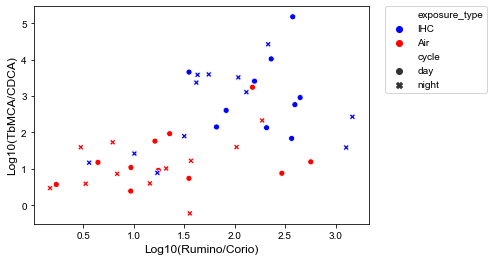

In [22]:
ax = sns.scatterplot(x='log_Ruminococcaceae_Coriobacteriaceae', y='TbMCA_CDCA', hue="exposure_type", style='cycle',
                palette=['blue', 'red'], markers=['o', 'X'], data=log_ratios3)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Log10(TbMCA/CDCA)', fontsize=12)
plt.xlabel('Log10(Rumino/Corio)', fontsize=12)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../../../../micro_metab_logratios_RCCT.png', dpi=300, bbox_inches = "tight")
plt.show()

# Replicate in Haddad Study

In [59]:
Haddad_LR  = pd.read_csv('../data/Haddad_IHC_logratios.csv', index_col=0)
Haddad_LR

,Log_UDCAtoTbMCA,host_age,exposure_type,micro-sample-id,Log_CtoR,Log_RtoC,metabolomics_sample_id
11548.A18.100.20,-0.744302,19.5,IHC,11548.A18.100.20,-3.466557933,3.466558,A18_100_20
11548.A18.100.15,-0.866613,17.0,IHC,11548.A18.100.15,-3.658420247,3.658420,A18_100_15
11548.A18.100.10,-1.457974,14.5,IHC,11548.A18.100.10,-4.004298282,4.004298,A18_100_10
11548.A18.97.10,-0.827798,14.5,IHC,11548.A18.97.10,-3.671542534,3.671543,A18_97_10
11548.A18.100.1,-1.975416,10.0,IHC,11548.A18.100.1,-3.237524384,3.237524,A18_100_01
...,...,...,...,...,...,...,...
11548.A23.120.15,-0.713402,17.0,Air,11548.A23.120.15,-3.612461123,3.612461,A23_120_15
11548.A23.120.1,-1.738590,10.0,Air,11548.A23.120.1,-4.930870326,4.930870,A23_120_01
11548.A23.119.20,0.066340,19.5,Air,11548.A23.119.20,-5.227984312,5.227984,A23_119_20
11548.A23.120.5,0.161050,12.0,Air,11548.A23.120.5,-4.08933202,4.089332,A23_120_05


In [69]:
print(Haddad_LR.shape)
Haddad_LR2 = Haddad_LR.replace([np.inf, -np.inf], np.nan)
Haddad_LR_nan = Haddad_LR2.dropna(subset=['Log_RtoC','Log_UDCAtoTbMCA'])
print(Haddad_LR_nan.shape)
#removed 2 samples with infinity

(113, 7)
(111, 7)


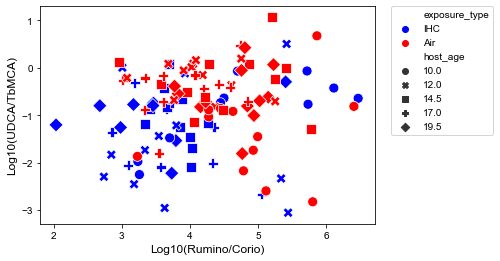

In [70]:
ax = sns.scatterplot(x='Log_RtoC', y='Log_UDCAtoTbMCA', hue="exposure_type", style='host_age',
                palette=['blue', 'red'], s=100, data=Haddad_LR_nan)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Log10(UDCA/TbMCA)', fontsize=12)
plt.xlabel('Log10(Rumino/Corio)', fontsize=12)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/micro_metab_logratios_RCCT.svg', dpi=300, bbox_inches = "tight")
plt.show()

slope 0.1405267500425398
p =  0.12771765357025064
R2= 0.021155370389142


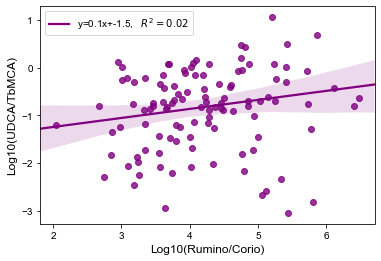

In [71]:
slope, intercept, r_value, p_value, std_err = stats.linregress(Haddad_LR_nan['Log_RtoC'],
                                                                    Haddad_LR_nan['Log_UDCAtoTbMCA'])
print("slope", slope)
print("p = ", p_value)
print('R2=', r_value*r_value)
ax = sns.regplot(x='Log_RtoC', y='Log_UDCAtoTbMCA', robust=True,
                color='purple', data=Haddad_LR_nan, 
               line_kws={'label':"y={0:.1f}x+{1:.1f},   ".format(slope,intercept) + '$R^2={0:.2f}$'.format(r_value**2)})
ax.legend()
plt.ylabel('Log10(UDCA/TbMCA)', fontsize=12)
plt.xlabel('Log10(Rumino/Corio)', fontsize=12)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/micro_metab_logratios_RCCT_linear.svg', dpi=300, bbox_inches = "tight")
plt.show()

### Only TP 12 (closest to Circadian Study)

In [72]:
Haddad_LR_nan_12 = Haddad_LR_nan[Haddad_LR_nan['host_age'] == 12.0]
Haddad_LR_nan_12.head()

,Log_UDCAtoTbMCA,host_age,exposure_type,micro-sample-id,Log_CtoR,Log_RtoC,metabolomics_sample_id
11548.A18.100.5,0.003145,12.0,IHC,11548.A18.100.5,-3.010102214,3.010102,A18_100_05
11548.A18.97.5,-2.453791,12.0,IHC,11548.A18.97.5,-3.181426515,3.181427,A18_97_05
11548.A18.98.5,-2.955761,12.0,IHC,11548.A18.98.5,-3.630636861,3.630637,A18_98_05
11548.A18.99.5,0.502850,12.0,IHC,11548.A18.99.5,-5.420534999,5.420535,A18_99_05
11548.A19.101.5,-0.117041,12.0,IHC,11548.A19.101.5,-3.927689122,3.927689,A19_101_05


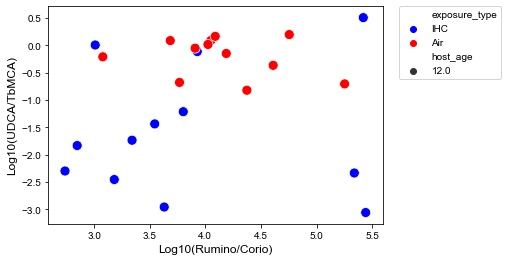

In [73]:
ax = sns.scatterplot(x='Log_RtoC', y='Log_UDCAtoTbMCA', hue="exposure_type", style='host_age',
                palette=['blue', 'red'], s=100, data=Haddad_LR_nan_12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Log10(UDCA/TbMCA)', fontsize=12)
plt.xlabel('Log10(Rumino/Corio)', fontsize=12)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/micro_metab_logratios_RCCT.svg', dpi=300, bbox_inches = "tight")
plt.show()

slope 0.15964696916966345
p =  0.5858089254866359
R2= 0.01371205563939405


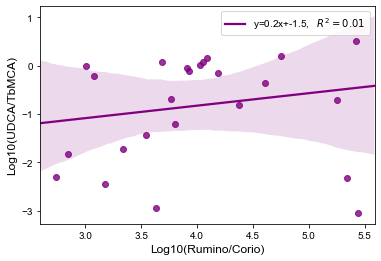

In [74]:
slope, intercept, r_value, p_value, std_err = stats.linregress(Haddad_LR_nan_12['Log_RtoC'],
                                                                    Haddad_LR_nan_12['Log_UDCAtoTbMCA'])
print("slope", slope)
print("p = ", p_value)
print('R2=', r_value*r_value)
ax = sns.regplot(x='Log_RtoC', y='Log_UDCAtoTbMCA', robust=True,
                color='purple', data=Haddad_LR_nan_12, 
               line_kws={'label':"y={0:.1f}x+{1:.1f},   ".format(slope,intercept) + '$R^2={0:.2f}$'.format(r_value**2)})
ax.legend()
plt.ylabel('Log10(UDCA/TbMCA)', fontsize=12)
plt.xlabel('Log10(Rumino/Corio)', fontsize=12)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/micro_metab_logratios_RCCT_linear.svg', dpi=300, bbox_inches = "tight")
plt.show()

### Only Last TP

In [75]:
Haddad_LR_nan_19 = Haddad_LR_nan[Haddad_LR_nan['host_age'] == 19.5]
Haddad_LR_nan_19.head()

,Log_UDCAtoTbMCA,host_age,exposure_type,micro-sample-id,Log_CtoR,Log_RtoC,metabolomics_sample_id
11548.A18.100.20,-0.744302,19.5,IHC,11548.A18.100.20,-3.466557933,3.466558,A18_100_20
11548.A18.97.20,-0.773728,19.5,IHC,11548.A18.97.20,-3.172355809,3.172356,A18_97_20
11548.A18.99.20,-1.203255,19.5,IHC,11548.A18.99.20,-2.036105228,2.036105,A18_99_20
11548.A18.98.20,-1.535303,19.5,IHC,11548.A18.98.20,-3.795489189,3.795489,A18_98_20
11548.A19.101.20,-0.296039,19.5,IHC,11548.A19.101.20,-5.405675885,5.405676,A19_101_20


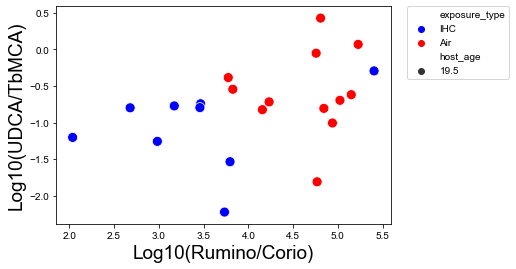

In [76]:
ax = sns.scatterplot(x='Log_RtoC', y='Log_UDCAtoTbMCA', hue="exposure_type", style='host_age',
                palette=['blue', 'red'], s=100, data=Haddad_LR_nan_19)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Log10(UDCA/TbMCA)', fontsize=19)
plt.xlabel('Log10(Rumino/Corio)', fontsize=19)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/micro_metab_logratios_RCCT.svg', dpi=300, bbox_inches = "tight")
plt.show()

slope 0.24720698095925212
p =  0.09079337070142034
R2= 0.14315490753148677


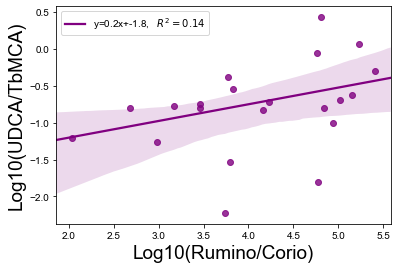

In [77]:
slope, intercept, r_value, p_value, std_err = stats.linregress(Haddad_LR_nan_19['Log_RtoC'],
                                                                    Haddad_LR_nan_19['Log_UDCAtoTbMCA'])
print("slope", slope)
print("p = ", p_value)
print('R2=', r_value*r_value)
ax = sns.regplot(x='Log_RtoC', y='Log_UDCAtoTbMCA', robust=True,
                color='purple', data=Haddad_LR_nan_19, 
               line_kws={'label':"y={0:.1f}x+{1:.1f},   ".format(slope,intercept) + '$R^2={0:.2f}$'.format(r_value**2)})
ax.legend()
plt.ylabel('Log10(UDCA/TbMCA)', fontsize=19)
plt.xlabel('Log10(Rumino/Corio)', fontsize=19)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/micro_metab_logratios_RCCT_linear.svg', dpi=300, bbox_inches = "tight")
plt.show()

### Late (Last 3) TP only

In [80]:
Haddad_LR_nan_late = Haddad_LR_nan[Haddad_LR_nan['host_age'].isin([14.5, 17.0, 19.5])]
Haddad_LR_nan_late.head()

,Log_UDCAtoTbMCA,host_age,exposure_type,micro-sample-id,Log_CtoR,Log_RtoC,metabolomics_sample_id
11548.A18.100.20,-0.744302,19.5,IHC,11548.A18.100.20,-3.466557933,3.466558,A18_100_20
11548.A18.100.15,-0.866613,17.0,IHC,11548.A18.100.15,-3.658420247,3.658420,A18_100_15
11548.A18.100.10,-1.457974,14.5,IHC,11548.A18.100.10,-4.004298282,4.004298,A18_100_10
11548.A18.97.10,-0.827798,14.5,IHC,11548.A18.97.10,-3.671542534,3.671543,A18_97_10
11548.A18.98.10,-0.426657,14.5,IHC,11548.A18.98.10,-3.627668723,3.627669,A18_98_10


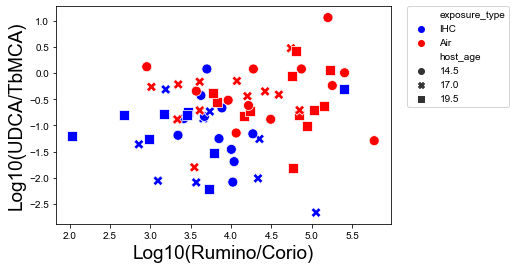

In [82]:
ax = sns.scatterplot(x='Log_RtoC', y='Log_UDCAtoTbMCA', hue="exposure_type", style='host_age',
                palette=['blue', 'red'], s=100, data=Haddad_LR_nan_late)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('Log10(UDCA/TbMCA)', fontsize=19)
plt.xlabel('Log10(Rumino/Corio)', fontsize=19)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/micro_metab_logratios_RCCT.svg', dpi=300, bbox_inches = "tight")
plt.show()

slope 0.19413068127668037
p =  0.09552911070681647
R2= 0.04348187358169507


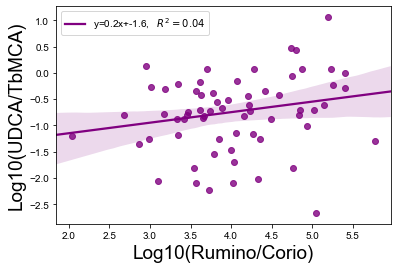

In [84]:
slope, intercept, r_value, p_value, std_err = stats.linregress(Haddad_LR_nan_late['Log_RtoC'],
                                                                    Haddad_LR_nan_late['Log_UDCAtoTbMCA'])
print("slope", slope)
print("p = ", p_value)
print('R2=', r_value*r_value)
ax = sns.regplot(x='Log_RtoC', y='Log_UDCAtoTbMCA', robust=True,
                color='purple', data=Haddad_LR_nan_late, 
               line_kws={'label':"y={0:.1f}x+{1:.1f},   ".format(slope,intercept) + '$R^2={0:.2f}$'.format(r_value**2)})
ax.legend()
plt.ylabel('Log10(UDCA/TbMCA)', fontsize=19)
plt.xlabel('Log10(Rumino/Corio)', fontsize=19)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/micro_metab_logratios_RCCT_linear.svg', dpi=300, bbox_inches = "tight")
plt.show()